# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_vf = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
df_vf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
num_unique_mice = df_vf['Mouse ID'].nunique()
print("Number of Unique Mice:", num_unique_mice)

Number of Unique Mice: 249


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df_vf[df_vf.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print("Duplicate Rows:")
print(duplicate_mice)

Duplicate Rows:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           4

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = df_vf[df_vf.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_id = duplicate_mice['Mouse ID'].iloc[0] 
all_data_for_duplicate_mouse = df_vf[df_vf['Mouse ID'] == duplicate_mouse_id]
print("Duplicate Mouse ID:", duplicate_mouse_id)
print("All Data for Duplicate Mouse:")
print(all_data_for_duplicate_mouse)

Duplicate Mouse ID: g989
All Data for Duplicate Mouse:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df_vf.drop_duplicates(subset=['Mouse ID'], keep='first')
print(clean_df.head())

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
10     s185    Capomulin  Female           3          17          0   
20     x401    Capomulin  Female          16          15          0   
30     m601    Capomulin    Male          22          17          0   
40     g791     Ramicane    Male          11          16          0   

    Tumor Volume (mm3)  Metastatic Sites  
0                 45.0                 0  
10                45.0                 0  
20                45.0                 0  
30                45.0                 0  
40                45.0                 0  


In [12]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_clean_df = clean_df['Mouse ID'].nunique()

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = df_vf.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean_tumor_volume=np.mean,
    median_tumor_volume=np.median,
    tumor_volume_variance=np.var,
    tumor_volume_std=np.std,
    tumor_volume_sem='sem'
).reset_index()
print(summary_statistics_df)


NameError: name 'np' is not defined

In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_df = df_vf.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean = 'mean',
    median = 'median',
    var = 'var',
    std = 'std',
    sem = 'sem'
).reset_index()
print(summary_statistics_df)

  Drug Regimen       mean     median        var       std       sem
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.322552  50.854632  42.351070  6.507770  0.512884
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

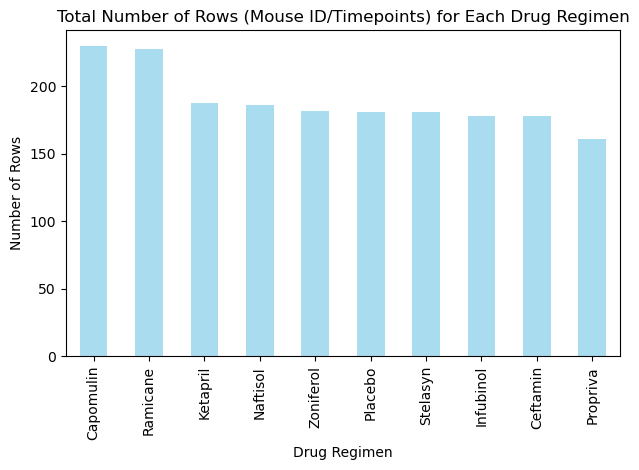

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = df_vf['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.tight_layout()
plt.show()

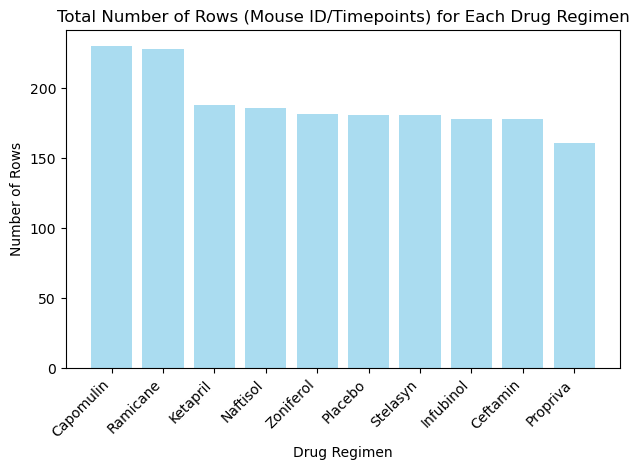

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = df_vf['Drug Regimen'].value_counts()

plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue', alpha=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

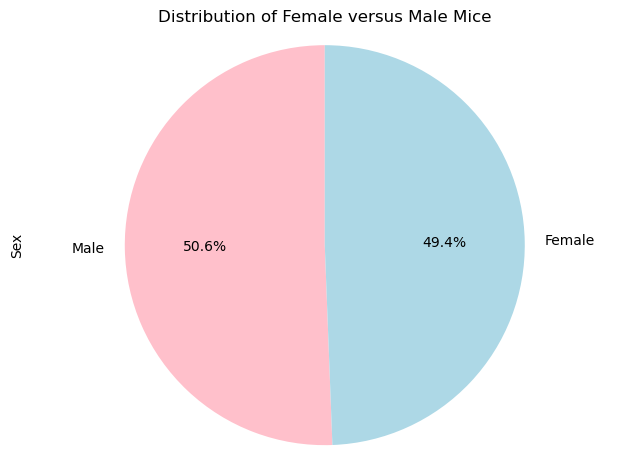

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = df_vf['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=90)


plt.axis('equal')
plt.title('Distribution of Female versus Male Mice')

plt.tight_layout()
plt.show()




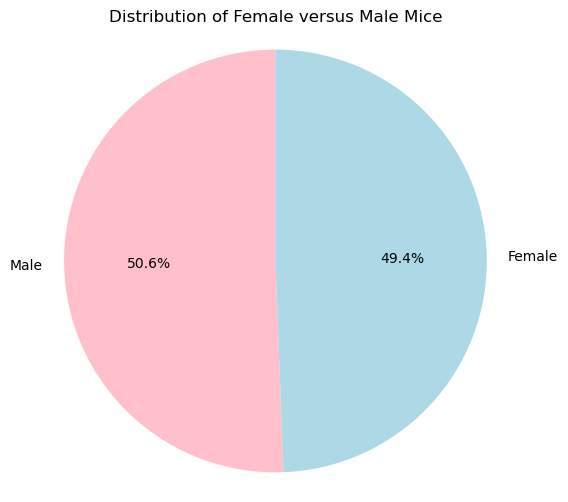

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = df_vf['Sex'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=90)

plt.axis('equal')
plt.title('Distribution of Female versus Male Mice')


plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = df_vf[df_vf['Drug Regimen'].isin(selected_regimens)]


last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()


final_tumor_volume_df = pd.merge(last_timepoints, df_vf, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume_df = final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

print(final_tumor_volume_df)








   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [26]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
      
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_subset = df_vf.loc[df_vf['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    quartiles = tumor_vol_subset.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    # add subset 

    tumor_vol_data.append(tumor_vol_subset)
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    print(f"Drug Regimen: {treatment}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound for Outliers: {lower_bound}")
    print(f"Upper Bound for Outliers: {upper_bound}")
    potential_outliers = tumor_vol_subset.loc[(tumor_vol_subset < lower_bound) | (tumor_vol_subset > upper_bound)]
    if not potential_outliers.empty:
        print("Potential Outliers:")
        print(potential_outliers)
    else:
        print("No potential outliers.")
    print("\n")


Drug Regimen: Capomulin
Lower Quartile: 37.685932865
Upper Quartile: 45.0
IQR: 7.314067135000002
Lower Bound for Outliers: 26.714832162499995
Upper Bound for Outliers: 55.9711007025
Potential Outliers:
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64


Drug Regimen: Ramicane
Lower Quartile: 36.674634585
Upper Quartile: 45.0
IQR: 8.325365415
Lower Bound for Outliers: 24.1865864625
Upper Bound for Outliers: 57.488048122500004
Potential Outliers:
9    22.050126
Name: Tumor Volume (mm3), dtype: float64


Drug Regimen: Infubinol
Lower Quartile: 47.3123533
Upper Quartile: 57.314443967500004
IQR: 10.002090667500006
Lower Bound for Outliers: 32.309217298749985
Upper Bound for Outliers: 72.31757996875001
No potential outliers.


Drug Regimen: Ceftamin
Lower Quartile: 47.2084271125
Upper Quartile: 56.801437570000004
IQR: 9.593010457500007
Lower Bound for Outliers: 32.81891142624998
Upper Bound for Outliers: 71.19095325625001
No potential outliers.




<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

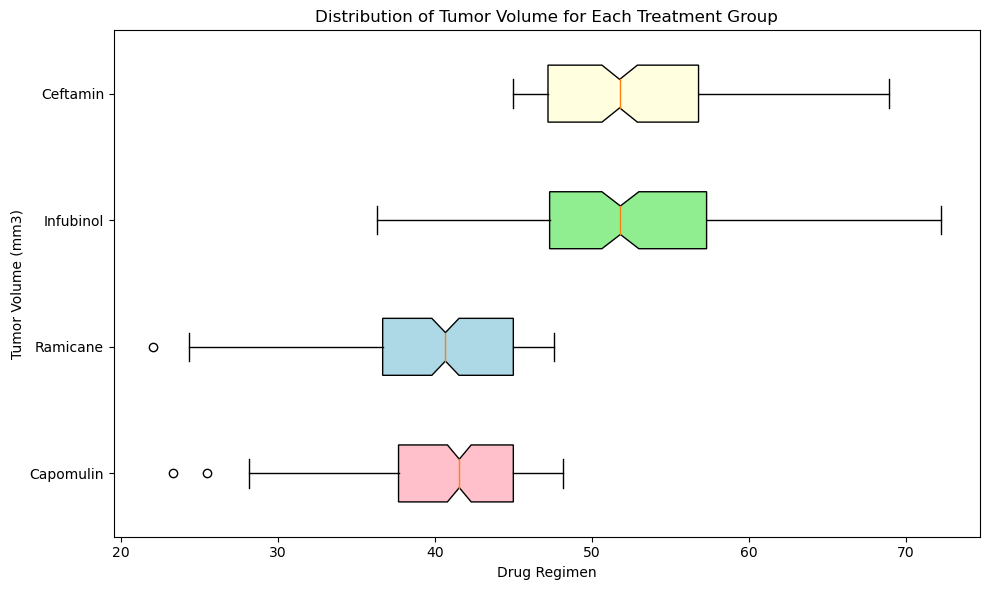

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []
for treatment in treatments:
    tumor_vol_subset = df_vf.loc[df_vf['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol_subset)
    plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, notch=True, vert=False, patch_artist=True)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
box_colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(plt.gca().patches, box_colors):
    patch.set_facecolor(color)
    plt.tight_layout()
plt.show()

## Line and Scatter Plots

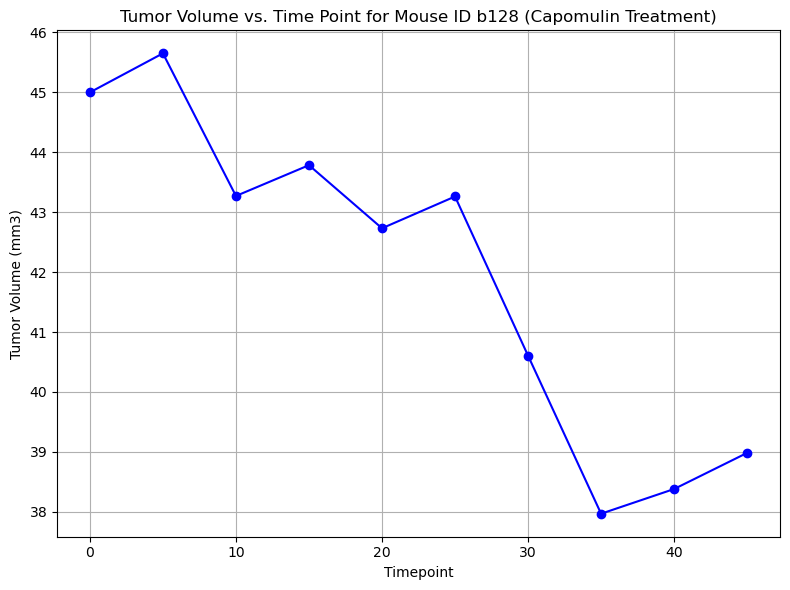

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'b128'
capomulin_data = df_vf.loc[(df_vf['Drug Regimen'] == 'Capomulin') & (df_vf['Mouse ID'] == mouse_id)]
plt.figure(figsize=(8, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin Treatment)")
plt.grid(True)
plt.tight_layout()
plt.show()

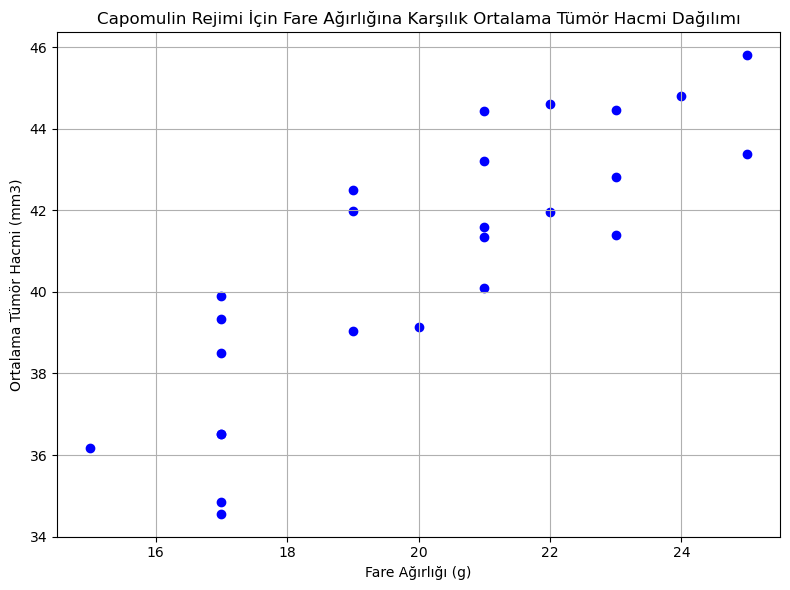

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = df_vf[df_vf['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='blue', marker='o')

plt.xlabel('Fare Ağırlığı (g)')
plt.ylabel('Ortalama Tümör Hacmi (mm3)')
plt.title('Capomulin Rejimi İçin Fare Ağırlığına Karşılık Ortalama Tümör Hacmi Dağılımı')



plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


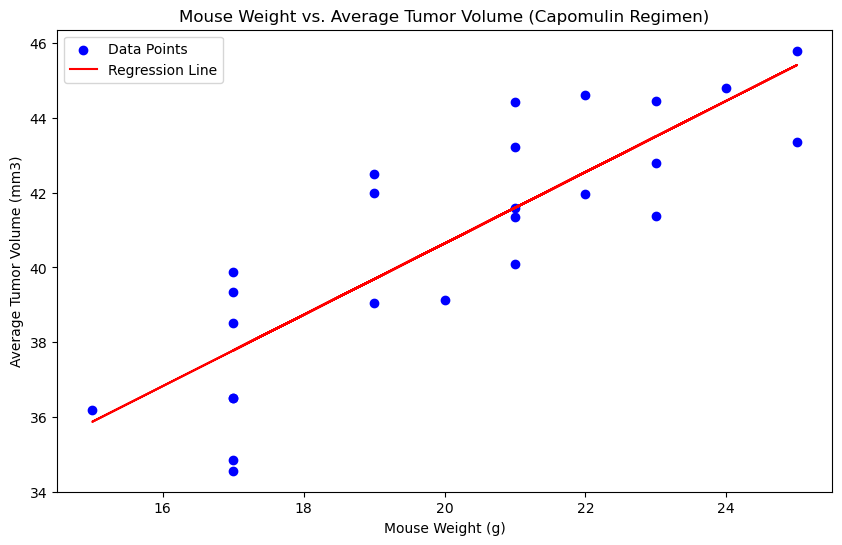

In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()


correlation_coefficient = np.corrcoef(mouse_weight, avg_tumor_volume)[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='blue', label='Data Points')
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label='Regression Line')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.legend()
plt.show()